In [113]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats 
import pylab
import seaborn as sns
import random
from scipy.stats import kruskal
from scipy.stats import chi2_contingency
from scipy.stats import levene
import statsmodels.api as sm

In [303]:
df = pd.read_csv('Stroke_data_cleaned.csv')
df

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,58.0,1.0,0.0,Yes,Private,Urban,87.96,39.2,never smoked,0.0
1,1,Female,70.0,0.0,0.0,Yes,Private,Rural,69.04,35.9,formerly smoked,0.0
2,2,Female,52.0,0.0,0.0,Yes,Private,Urban,77.59,17.7,formerly smoked,0.0
3,3,Female,75.0,0.0,1.0,Yes,Self-employed,Rural,243.53,27.0,never smoked,0.0
4,4,Female,32.0,0.0,0.0,Yes,Private,Rural,77.67,32.3,smokes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28911,29060,Female,10.0,0.0,0.0,No,children,Urban,58.64,20.4,never smoked,0.0
28912,29061,Female,56.0,0.0,0.0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0.0
28913,29062,Female,82.0,1.0,0.0,Yes,Private,Urban,91.94,28.9,formerly smoked,0.0
28914,29063,Male,40.0,0.0,0.0,Yes,Private,Urban,99.16,33.2,never smoked,0.0


In [220]:
#removing outliers of df and making a dataset only for people with stroke 
Q1_bmi = df['bmi'].quantile(0.25)
Q3_bmi = df['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi   #IQR is interquartile range. 
Q1_avg = df['avg_glucose_level'].quantile(0.25)
Q3_avg = df['avg_glucose_level'].quantile(0.75)
IQR_avg = Q3_avg - Q1_avg   #IQR is interquartile range. 

filter_bmi = (df['bmi'] >= Q1_bmi - 1.5 * IQR_bmi) & (df['bmi'] <= Q3_bmi + 1.5 *IQR_bmi)
filter_avg = (df['avg_glucose_level'] >= Q1_avg - 1.5 * IQR_avg) & (df['avg_glucose_level'] <= Q3_avg + 1.5 *IQR_avg)
df = df.loc[filter_bmi & filter_avg]

In [248]:
df1 = df.loc[(df['stroke'] == 1) & (df['age'] > 25)] 
df_smp = df1.append(df.loc[df['stroke'] == 0.0].sample(365))

<ipython-input-248-79d6014568c4>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_smp = df1.append(df.loc[df['stroke'] == 0.0].sample(365))


In [ ]:
# we work on the data after removing the outlers!

# we would like to know the effect of work_type on the average glucose levels for people with a stroke
# we would like to know the effect of having a heart disease on the avergage glucose levels for people who suffer from a stroke 
# for people that suffer a stroke, is bmi same for males and females? 
# for people that suffer a stroke, does the marital status affect the bmi levels?
# for people that suffer a stroke, does smoking affect a person's BMI?
# for people that suffer a stroke, does the residence type affect the person's avg glucose levels?
# the bmi average is the same for people that suffer and don't suffer a stroke?
# the avg glucose level is the same for people that suffer and don't suffer a stroke?

# =================== 
# correlation analysis: 
# 1. between metric data .. (age, bmi), (avg_glucose_levels, bmi), (avg_glucose_levels, age)
# 2. between nominal data .. (stroke, hypertension), (stroke, heart_disease), (stroke, marital status), (stroke, work_type)
# ========================== 
#regression 
# for all correlations! 

In [151]:
# we would like to know the effect of work_type on the average glucose levels for people with a stroke>> can try when u remove the ourliers 

df_private = df.loc[(df['work_type'] == 'Private') & (df['stroke'] == 1.0)].avg_glucose_level
df_self = df.loc[(df['work_type'] == 'Self-employed') & (df['stroke'] == 1.0)].avg_glucose_level
df_govt = df.loc[(df['work_type'] == 'Govt_job') & (df['stroke'] == 1.0)].avg_glucose_level

stats.kruskal(df_private, df_self, df_govt)

KruskalResult(statistic=0.344286526484418, pvalue=0.8418585571424071)

In [ ]:
df_private = df.loc[(df['work_type'] == 'Private') & (df['stroke'] == 1.0)]
df_self = df.loc[(df['work_type'] == 'Self-employed') & (df['stroke'] == 1.0)]
df_govt = df.loc[(df['work_type'] == 'Govt_job') & (df['stroke'] == 1.0)]

In [13]:
# we would like to know the effect of work_type on heart disease for people with a stroke 
# heart disease is a nominal variable .. Cannot use kruskal test!! 

df_private = df.loc[(df['work_type'] == 'Private') & (df['stroke'] == 1.0)].heart_disease
df_self = df.loc[(df['work_type'] == 'Self-employed') & (df['stroke'] == 1.0)].heart_disease
df_govt = df.loc[(df['work_type'] == 'Govt_job') & (df['stroke'] == 1.0)].heart_disease
stats.kruskal(df_private, df_self, df_govt)

KruskalResult(statistic=2.48559991913869, pvalue=0.2885750871242154)

In [17]:
# we would like to know the effect of having a heart disease on the probability of having a stroke
# stroke is not an ordinal data!
# heart disease is also not an ordinal data???
# this test should be using Mann Whitney U test
df_heart =  df.loc[(df['heart_disease'] == 1.0)].stroke
df_noheart = df.loc[(df['heart_disease'] == 0.0)].stroke
stats.mannwhitneyu(df_heart, df_noheart)

MannwhitneyuResult(statistic=21989935.0, pvalue=2.249436093836269e-05)

In [153]:
# correlation between age when having stroke and age when not having stroke >>  meaningless question actually! xD
df_stroke =  df.loc[(df['stroke'] == 1.0)].age
df_nostroke = df.loc[(df['stroke'] == 0.0)].age.sample(df_stroke.shape[0])
stats.mannwhitneyu(df_stroke, df_nostroke)

MannwhitneyuResult(statistic=107568.5, pvalue=3.152805966012023e-61)

In [154]:
print(stats.pearsonr(df_stroke,df_nostroke))
print(stats.spearmanr(df_stroke,df_nostroke))

(0.05279473247985542, 0.3219275078525776)
SpearmanrResult(correlation=0.049096626800939666, pvalue=0.3570316614820461)


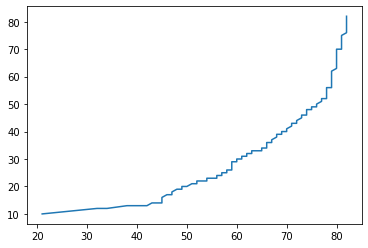

In [155]:
plt.plot(df_stroke.sort_values(), df_nostroke.sort_values())

In [87]:
#for people with a stroke, is there a correlation between the BMI and the avg glucose levels?
# people with higher bmi tend to have higher glucose levels?
# not a causality relationship for sure

stats.spearmanr(df['bmi'], df['avg_glucose_level'])

SpearmanrResult(correlation=0.11507083585706132, pvalue=8.264772747080916e-86)

In [344]:
df.loc[df['stroke'] == 1.0].avg_glucose_level.mean()

130.91965265082266

In [345]:
df.loc[df['stroke'] == 0.0].avg_glucose_level.mean()

105.91525996686454

In [346]:
df.loc[df['stroke'] == 1.0].bmi.mean()

29.833455210237645

In [347]:
df.loc[df['stroke'] == 0.0].bmi.mean()

30.053826359758848

In [356]:
# correlation between age and bmi

stats.spearmanr(df_smp['bmi'], df_smp['age'])

SpearmanrResult(correlation=-0.08579817145923241, pvalue=0.020425269169629126)

In [357]:
stats.pearsonr(df_smp['avg_glucose_level'], df_smp['age'])

(-0.05830381206603859, 0.11550553380117025)

In [358]:
stats.pearsonr(df_smp['bmi'], df_smp['avg_glucose_level'])

(-0.013088502982140196, 0.7240577126854468)

In [348]:
# correlation between having hypertension/heart-disease with bmi
stats.spearmanr(df['bmi'], df['hypertension'])

SpearmanrResult(correlation=0.13331370506729873, pvalue=9.02762129184754e-115)

In [156]:
def cramers_V(var1,var2) :
    confusion_matrix =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))

In [304]:
# correlation between having stroke and having heart disease 
cramers_V(df['stroke'], df['heart_disease'])

0.10506806602165308

In [305]:
cramers_V(df['stroke'], df['hypertension'])

0.07869925116325828

In [306]:
cramers_V(df['stroke'], df['ever_married'])

0.047495503251048975

In [307]:
cramers_V(df['stroke'], df['work_type'])

0.051203143756644746

In [309]:
#correclation between worktype and having a stroke
cramers_V(df['smoking_status'], df['stroke'])

0.027549301298782376

In [159]:
#one nominal and one continous variable 
# correlation between age and having stroke 
# assumes age is normal >> is a good approximation 
stats.pointbiserialr(df['age'], df['stroke'])

PointbiserialrResult(correlation=0.14949216527716586, pvalue=4.8154982729054083e-119)

In [160]:
stats.levene(df1,df2, center='median')

LeveneResult(statistic=119.82108787537771, pvalue=1.562329863039877e-26)

{'whiskers': [<matplotlib.lines.Line2D at 0x23f22100>,
 'caps': [<matplotlib.lines.Line2D at 0x23f22460>,
 'boxes': [<matplotlib.lines.Line2D at 0x23f12e80>],
 'medians': [<matplotlib.lines.Line2D at 0x23f227c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23f22970>],
 'means': []}

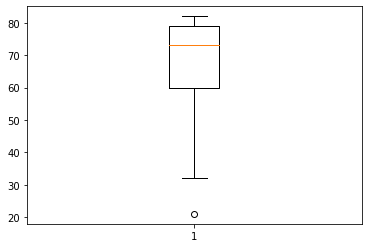

In [163]:
df1 = df.loc[df['stroke'] == 1.0].age
df2 = df.loc[df['stroke'] == 0.0].age.sample(df1.shape[0])

plt.boxplot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x12fd9cb8>,
 'caps': [<matplotlib.lines.Line2D at 0x12fd9958>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fd9e68>],
 'medians': [<matplotlib.lines.Line2D at 0x12fd95f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x12fd9448>],
 'means': []}

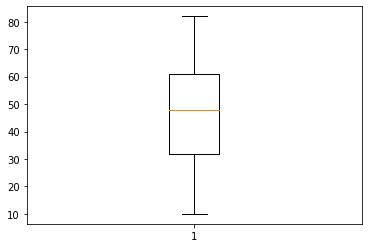

In [96]:
plt.boxplot(df2)

In [314]:
# linear regression between age and bmi for people with a stroke 365 entries
df_age = sm.add_constant(df1.age)
model = sm.OLS(df1.bmi, df_age)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     28.57
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                        15:54:16   Log-Likelihood:                -1125.0
No. Observations:                 365   AIC:                             2254.
Df Residuals:                     363   BIC:                             2262.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.0946      1.622     22.875      0.0

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
88,97,Male,80.0,0.0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1.0
190,199,Male,74.0,1.0,1.0,Yes,Private,Rural,70.09,27.4,never smoked,1.0
206,215,Female,69.0,0.0,0.0,No,Private,Urban,94.39,22.8,never smoked,1.0
396,405,Female,81.0,1.0,0.0,Yes,Private,Rural,80.43,29.7,never smoked,1.0
431,440,Female,61.0,0.0,1.0,Yes,Govt_job,Rural,120.46,36.8,smokes,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28714,28863,Male,79.0,0.0,1.0,Yes,Self-employed,Urban,88.29,36.0,never smoked,1.0
28742,28891,Male,76.0,0.0,0.0,Yes,Self-employed,Rural,93.38,26.7,formerly smoked,1.0
28761,28910,Female,56.0,0.0,0.0,Yes,Private,Rural,83.27,32.9,smokes,1.0
28855,29004,Female,80.0,0.0,0.0,Yes,Self-employed,Urban,75.91,26.7,never smoked,1.0


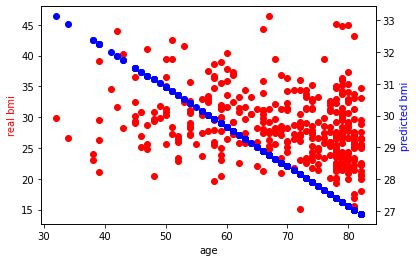

In [312]:
y_predict = results.predict(df_age)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df1['age'], df1['bmi'],color= 'r')
ax2.scatter(df1['age'], y_predict, color='b')
ax1.set_xlabel('age')
ax1.set_ylabel('real bmi', color='r')
ax2.set_ylabel('predicted bmi', color='b')

plt.show()
fig.savefig('age vs bmi.png')

In [315]:
# linear regression between avg_glucose_levels and bmi for people with a stroke
df_bmi = sm.add_constant(df1['bmi'])
model = sm.OLS(df1['avg_glucose_level'], df_bmi)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2331
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.630
Time:                        16:09:03   Log-Likelihood:                -1666.3
No. Observations:                 365   AIC:                             3337.
Df Residuals:                     363   BIC:                             3344.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.7933      6.475     13.713      0.0

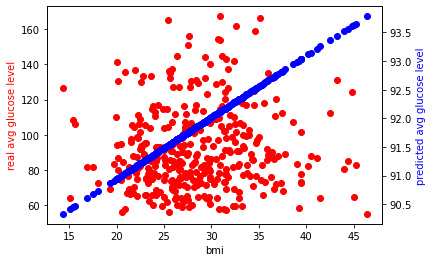

In [316]:
y_predict = results.predict(df_bmi)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df1['bmi'], df1['avg_glucose_level'],color= 'r')
ax2.scatter(df1['bmi'], y_predict, color='b')
ax1.set_xlabel('bmi')
ax1.set_ylabel('real avg glucose level', color='r')
ax2.set_ylabel('predicted avg glucose level', color='b')

plt.show()
fig.savefig('avg_glucose vs bmi.png')

In [317]:
# linear regression between age and avg glucose levels for people with a stroke
df_age = sm.add_constant(df1['age'])
model = sm.OLS(df1['avg_glucose_level'], df_age)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.189
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.140
Time:                        16:18:23   Log-Likelihood:                -1665.4
No. Observations:                 365   AIC:                             3335.
Df Residuals:                     363   BIC:                             3343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.4737      7.127     11.431      0.0

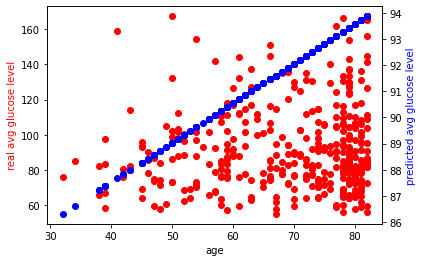

In [318]:
y_predict = results.predict(df_age)
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df1['age'], df1['avg_glucose_level'],color= 'r')
ax2.scatter(df1['age'], y_predict, color='b')
ax1.set_xlabel('age')
ax1.set_ylabel('real avg glucose level', color='r')
ax2.set_ylabel('predicted avg glucose level', color='b')

plt.show()
fig.savefig('avg_glucose vs age.png')

In [319]:
# age and bmi affecting the avg_glucose level
x = df1[['age','bmi']]
x1 = sm.add_constant(x)
model = sm.OLS(df1['avg_glucose_level'], x1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_glucose_level   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.515
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.221
Time:                        16:33:47   Log-Likelihood:                -1664.9
No. Observations:                 365   AIC:                             3336.
Df Residuals:                     362   BIC:                             3348.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.6192     11.139      6.609      0.0

In [320]:
#logistic regression between heart disease and stroke 
x = df_smp['heart_disease']
y = df_smp['stroke']
model = sm.Logit(y,x)
results = model.fit(method='newton')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.663471
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.043   
Dependent Variable: stroke           AIC:              970.6670
Date:               2023-02-03 16:47 BIC:              975.2600
No. Observations:   730              Log-Likelihood:   -484.33 
Df Model:           0                LL-Null:          -506.00 
Df Residuals:       729              LLR p-value:      nan     
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     6.0000                                     
----------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
heart_disease   1.9136    0.3571  5.3592  0.0000  1.2138  2.6135
===============================================================

"""

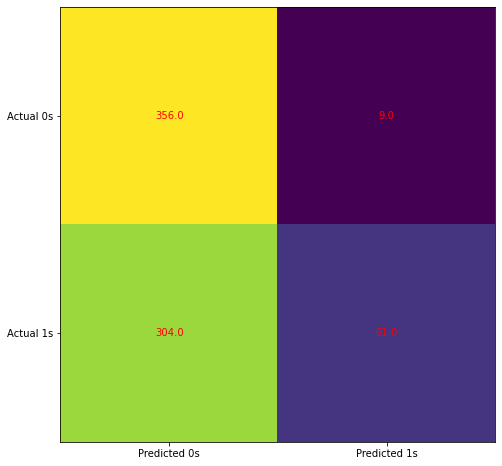

In [325]:
cm = results.pred_table()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
#ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
fig.savefig('heart disease vs stroke')

In [331]:
#logistic regression between avg glucose level and bmi and stroke
x = df_smp['avg_glucose_level']
y = df_smp['stroke']
model = sm.Logit(y,x)
results = model.fit(method='newton')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.693095
         Iterations 2


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.000    
Dependent Variable: stroke           AIC:              1013.9181
Date:               2023-02-03 17:16 BIC:              1018.5111
No. Observations:   730              Log-Likelihood:   -505.96  
Df Model:           0                LL-Null:          -506.00  
Df Residuals:       729              LLR p-value:      nan      
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     2.0000                                      
----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
----------------------------------------------------------------
avg_glucose_level -0.0002   0.0008 -0.2772 0.7817 -0.0017 0.0013
================================================================

"""

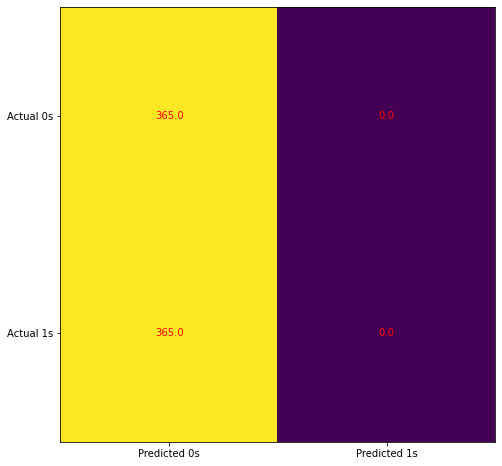

In [333]:
cm = results.pred_table()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
#ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
fig.savefig('1')

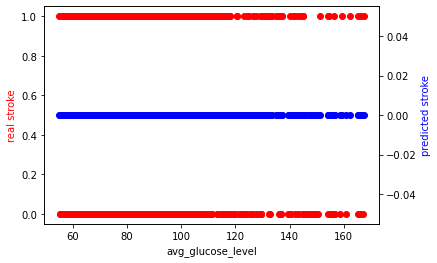

In [337]:
y_predict = (results.predict(x) >= 0.5).astype(int)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.scatter(df_smp['avg_glucose_level'], df_smp['stroke'],color= 'r')
ax2.scatter(df_smp['avg_glucose_level'], y_predict, color='b')
ax1.set_xlabel('avg_glucose_level')
ax1.set_ylabel('real stroke', color='r')
ax2.set_ylabel('predicted stroke', color='b')

plt.show()
fig.savefig('2.pdf')

In [294]:
#logistic regression between avg glucose level + heart disease and stroke
x = df_smp[['avg_glucose_level', 'heart_disease']]
y = df_smp['stroke']
model = sm.Logit(y,x)
results = model.fit(method='newton')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.659648
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.048     
Dependent Variable: stroke           AIC:              967.0860  
Date:               2023-02-02 15:50 BIC:              976.2720  
No. Observations:   730              Log-Likelihood:   -481.54   
Df Model:           1                LL-Null:          -506.00   
Df Residuals:       728              LLR p-value:      2.6813e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
avg_glucose_level -0.0019   0.0008 -2.3561 0.0185 -0.0035 -0.0003
heart_disease      2.1031   0.3662  5.7434 0.0000  1.3854  2.8207
=================================================================

"""

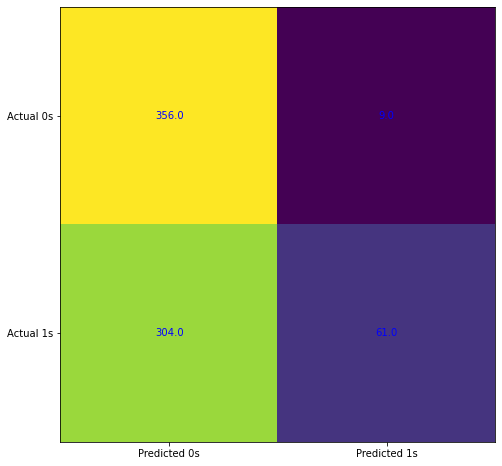

In [295]:
cm = results.pred_table()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
#ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

In [296]:
# hypertension + heart disease and stroke 
x = df_smp[['hypertension', 'heart_disease']]
y = df_smp['stroke']
model = sm.Logit(y,x)
results = model.fit(method='newton')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.642068
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.074     
Dependent Variable: stroke           AIC:              941.4191  
Date:               2023-02-02 15:51 BIC:              950.6052  
No. Observations:   730              Log-Likelihood:   -468.71   
Df Model:           1                LL-Null:          -506.00   
Df Residuals:       728              LLR p-value:      5.8355e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
                  Coef.   Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
hypertension      1.1565    0.2245  5.1513  0.0000  0.7165  1.5966
heart_disease     1.6751    0.3618  4.6297  0.0000  0.9660  2.3843
=================================================================

"""

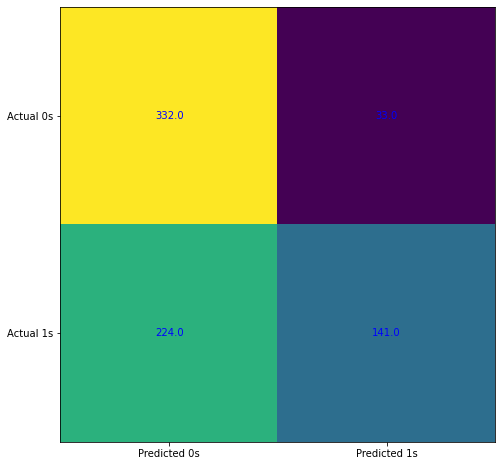

In [297]:
cm = results.pred_table()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
#ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

In [341]:
# hypertension + heart disease + avg glucose + bmi and stroke 
x = df_smp[['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df_smp['stroke']
model = sm.Logit(y,x)
results = model.fit(method='newton')
results.summary2()

Optimization terminated successfully.
         Current function value: 0.626831
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.096     
Dependent Variable: stroke           AIC:              923.1729  
Date:               2023-02-03 17:28 BIC:              941.5451  
No. Observations:   730              Log-Likelihood:   -457.59   
Df Model:           3                LL-Null:          -506.00   
Df Residuals:       726              LLR p-value:      7.4941e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
-----------------------------------------------------------------
hypertension        1.5372   0.2406  6.3877 0.0000  1.0655 2.0088
heart_disease       2.0352   0.3719  5.4725 0.0000  1.3063 2.7641
avg_glucose_level  -0.0019   0.0027 -0.7153 0.4744 -0.0071 0.0033
bmi                -0.0077   0.0088 -0.8796 0.3791 -0.0249 0.0095
=================================================================

"""

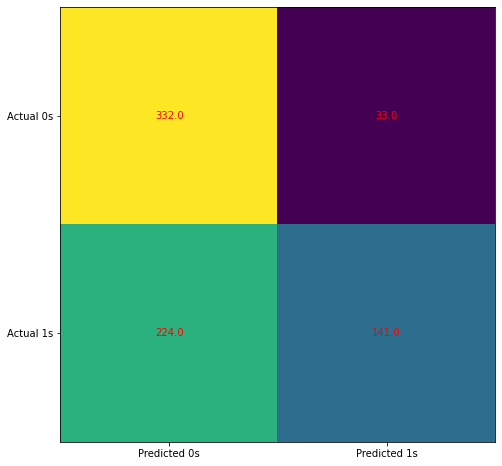

In [343]:
cm = results.pred_table()

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
#ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
fig.savefig('all in one')
